In [1]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion


Cloning into 'ForestDiffusion'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 447 (delta 82), reused 129 (delta 72), pack-reused 299 (from 1)
Receiving objects: 100% (447/447), 901.47 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [ ]:
%%writefile /kaggle/working/Practice/Credit_card_forrest.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.linear_model import LogisticRegression

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the original data's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a simple classifier on both original and generated datasets
clf_orig = LogisticRegression(max_iter=1000)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = LogisticRegression(max_iter=1000)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


In [ ]:
!python /kaggle/working/Practice/Credit_card_forrest.py

#  #RandomForest Classifier

In [ ]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load the CSV file
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    L = np.linalg.cholesky(target_corr_matrix)
    X_centered = X - np.mean(X, axis=0)
    X_transformed = np.dot(X_centered, L.T)
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the original data's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a Random Forest classifier on both original and generated datasets
clf_orig = RandomForestClassifier()
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier()
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


In [ ]:
!python /kaggle/working/Practice/Credit_card_forrest.py

# #Gradient Boosting Classifier

In [ ]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    L = np.linalg.cholesky(target_corr_matrix)
    X_centered = X - np.mean(X, axis=0)
    X_transformed = np.dot(X_centered, L.T)
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the original data's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a Gradient Boosting classifier on both original and generated datasets
clf_orig = GradientBoostingClassifier()
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = GradientBoostingClassifier()
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Original Data:
          0             1             2             3             4   \
0   1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
1   0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
2  -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
3  -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
4  -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
5   0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
6  -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
7   0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
8  -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
9  -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
10  0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
11 -0.247689  2.125498e-16  1.975426e-1

# #XGBoost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from xgboost import XGBClassifier  # Import XGBoost classifier

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    L = np.linalg.cholesky(target_corr_matrix)
    X_centered = X - np.mean(X, axis=0)
    X_transformed = np.dot(X_centered, L.T)
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the original data's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train an XGBoost classifier on both original and generated datasets
clf_orig = XGBClassifier()
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = XGBClassifier()
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Original Data:
          0             1             2             3             4   \
0   1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
1   0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
2  -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
3  -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
4  -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
5   0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
6  -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
7   0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
8  -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
9  -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
10  0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
11 -0.247689  2.125498e-16  1.975426e-1

# #Support Vector Classifier

In [ ]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

In [ ]:
%%writefile /kaggle/working/Practice/Credit_card_forrest.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from sklearn.svm import SVC
from ForestDiffusion import ForestDiffusionModel

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    L = np.linalg.cholesky(target_corr_matrix)
    X_centered = X - np.mean(X, axis=0)
    X_transformed = np.dot(X_centered, L.T)
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the original data's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train an SVC on both original and generated datasets
clf_orig = SVC()
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = SVC()
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


In [ ]:
!python /kaggle/working/Practice/Credit_card_forrest.py

# #CM for minority class only (Logistic Regression)

In [ ]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

In [ ]:
%%writefile /kaggle/working/Practice/Credit_card_forrest.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 2.1: Create a DataFrame for the minority class
minority_class_df = data[data.iloc[:, -1] == 1]  # Assuming class '1' is the minority

# Step 2.2: Calculate and print the correlation matrix for the minority class
correlation_matrix_minority = minority_class_df.iloc[:, :-1].corr()  # Exclude label column
print("Correlation Matrix of Minority Class:")
print(correlation_matrix_minority)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minority, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Minority Class")
plt.show()

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the minority class's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix_minority.values)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a simple classifier on both original and generated datasets
clf_orig = LogisticRegression(max_iter=1000)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = LogisticRegression(max_iter=1000)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


In [ ]:
!python /kaggle/working/Practice/Credit_card_forrest.py

# #CM for minority class only (Random Forest)

In [ ]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

In [ ]:
%%writefile /kaggle/working/Practice/Credit_card_forrest.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 2.1: Create a DataFrame for the minority class
minority_class_df = data[data.iloc[:, -1] == 1]  # Assuming class '1' is the minority

# Step 2.2: Calculate and print the correlation matrix for the minority class
correlation_matrix_minority = minority_class_df.iloc[:, :-1].corr()  # Exclude label column
print("Correlation Matrix of Minority Class:")
print(correlation_matrix_minority)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minority, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Minority Class")
plt.show()

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the minority class's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix_minority.values)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a Random Forest classifier on both original and generated datasets
clf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(n_estimators=100, random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")




In [ ]:
!python /kaggle/working/Practice/Credit_card_forrest.py

# #CM for minority class only (Gradient Boosting)

In [ ]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Original Data:
          0             1             2             3             4   \
0   1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
1   0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
2  -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
3  -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
4  -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
5   0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
6  -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
7   0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
8  -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
9  -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
10  0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
11 -0.247689  2.125498e-16  1.975426e-1

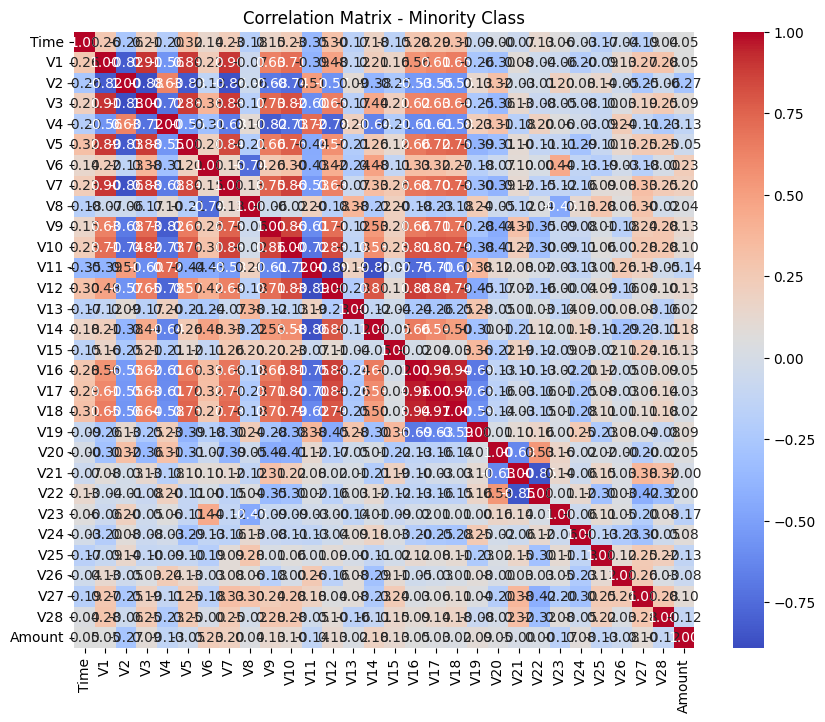

Class distribution after augmentation: {0.0: 284315, 1.0: 6188}
Recall score (original data): 0.1250
Recall score (generated data): 0.9838
F1 score (original data): 0.2194
F1 score (generated data): 0.9847
Number of fake samples generated: 5696


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and 
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels 

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 2.1: Create a DataFrame for the minority class
minority_class_df = data[data.iloc[:, -1] == 1]  

# Step 2.2: Calculate and print the correlation matrix for the minority class
correlation_matrix_minority = minority_class_df.iloc[:, :-1].corr()  # Exclude label column
print("Correlation Matrix of Minority Class:")
print(correlation_matrix_minority)

#visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minority, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Minority Class")
plt.show()

# Step 4: Separate the minority class
X_minority = X[y == 1]  

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the minority class's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix_minority.values)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a Gradient Boosting classifier on both original and generated datasets
clf_orig = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


# #CM for minority class only (XGBoost)

Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Minority Class:
            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.263358 -0.255465  0.209597 -0.196576  0.320502  0.143117   
V1      0.263358  1.000000 -0.819226  0.907875 -0.562688  0.894968  0.223961   
V2     -0.255465 -0.819226  1.000000 -0.876904  0.629688 -0.828391 -0.133373   
V3      0.209597  0.907875 -0.876904  1.000000 -0.723766  0.883689  0.383930   
V4     -0.196576 -0.562688  0.629688 -0.723766  1.000000 -0.550242 -0.310530   
V5      0.320502  0.894968 -0.828391  0.883689 -0.550242  1.000000  0.198775   
V6      0.143117  0.223961 -0.133373  0.383930 -0.310530  0.198775  1.000000   
V7      0.231853  0.897609 -0.862983  0.882312 -0.678238  0.839738  0.151266   
V8     -0.183096 -0.065787 -0.059535 -0.174837  0.099480 -0.207546 -0.743021   
V9      0.152750  0.631848 -0.684573  0.733208 -0.818853  0.658322  0.256004   
V10     0.226530  0.71

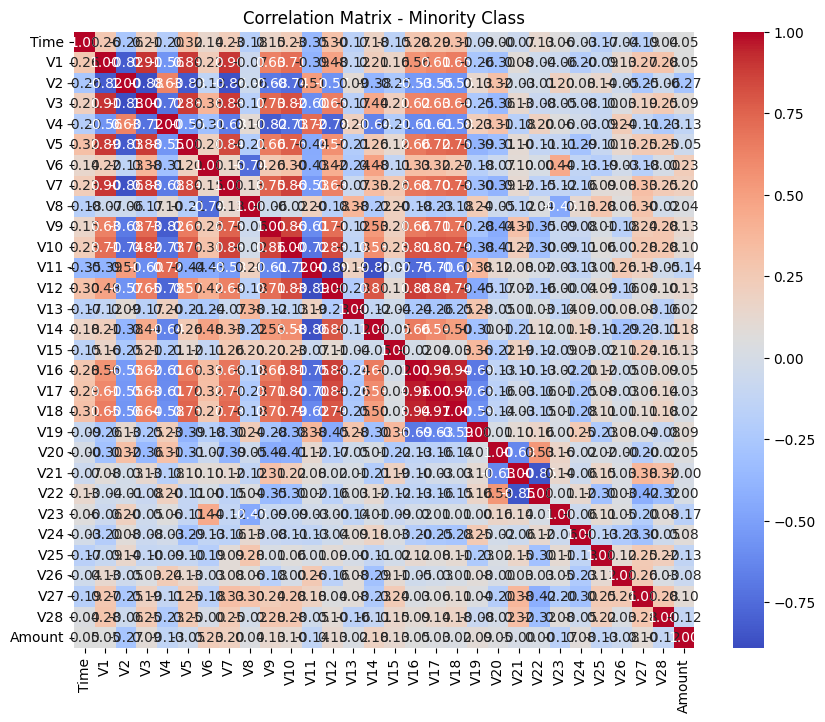

Class distribution after augmentation: {0.0: 284315, 1.0: 6188}
Recall score (original data): 0.8162
Recall score (generated data): 0.9877
F1 score (original data): 0.8706
F1 score (generated data): 0.9916
Number of fake samples generated: 5696


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from xgboost import XGBClassifier
import seaborn as sns

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 2.1: Create a DataFrame for the minority class
minority_class_df = data[data.iloc[:, -1] == 1]  # Assuming class '1' is the minority

# Step 2.2: Calculate and print the correlation matrix for the minority class
correlation_matrix_minority = minority_class_df.iloc[:, :-1].corr()  # Exclude label column
print("Correlation Matrix of Minority Class:")
print(correlation_matrix_minority)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minority, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Minority Class")
plt.show()

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the minority class's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix_minority.values)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train an XGBoost classifier on both original and generated datasets
clf_orig = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


In [3]:
!python /kaggle/working/Practice/Credit_card_forrest.py

Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Original Data:
          0             1             2   ...            27            28        29
0   1.000000  1.173963e-01 -1.059333e-02  ... -5.134591e-03 -9.412688e-03 -0.010596
1   0.117396  1.000000e+00  4.135835e-16  ...  1.198124e-16  2.083082e-15 -0.227709
2  -0.010593  4.135835e-16  1.000000e+00  ... -4.966953e-16 -5.093836e-16 -0.531409
3  -0.419618 -1.227819e-15  3.243764e-16  ...  1.045747e-15  9.775546e-16 -0.210880
4  -0.105260 -9.215150e-16 -1.121065e-15  ...  3.977061e-17 -2.761403e-18  0.098732
5   0.173072  1.812612e-17  5.157519e-16  ...  6.590482e-16 -5.613951e-18 -0.386356
6  -0.063016 -6.506567e-16  2.787346e-16  ... -4.452461e-16  2.594754e-16  0.215981
7   0.084714 -1.005191e-15  2.055934e-16  ... -1.782106e-15 -2.776530e-16  0.397311
8  -0.036949 -2.433822e-16 -5.377041e-17  ...  1.299943e-16 -6.200930e-16 -0.103079
9  -0.008660 -1.513678e-16  1.978488e-17  ... -6.709655e-17  1.

# #CM for minority class only (Support Vector Classifier)

In [1]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

Cloning into 'ForestDiffusion'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 447 (delta 82), reused 129 (delta 72), pack-reused 299 (from 1)
Receiving objects: 100% (447/447), 901.47 KiB | 14.31 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [2]:
%%writefile /kaggle/working/Practice/Credit_card_forrest.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.svm import SVC
import seaborn as sns

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

# Step 2.1: Create a DataFrame for the minority class
minority_class_df = data[data.iloc[:, -1] == 1]  # Assuming class '1' is the minority

# Step 2.2: Calculate and print the correlation matrix for the minority class
correlation_matrix_minority = minority_class_df.iloc[:, :-1].corr()  # Exclude label column
print("Correlation Matrix of Minority Class:")
print(correlation_matrix_minority)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minority, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Minority Class")
plt.show()

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the minority class's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix_minority.values)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a Support Vector Classifier on both original and generated datasets
clf_orig = SVC(kernel='rbf')  # You can choose different kernels like 'linear' or 'poly'
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = SVC(kernel='rbf')  # You can adjust kernel or hyperparameters
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


Overwriting /kaggle/working/Practice/Credit_card_forrest.py


In [3]:
!python /kaggle/working/Practice/Credit_card_forrest.py

Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Original Data:
          0             1             2   ...            27            28        29
0   1.000000  1.173963e-01 -1.059333e-02  ... -5.134591e-03 -9.412688e-03 -0.010596
1   0.117396  1.000000e+00  4.135835e-16  ...  1.198124e-16  2.083082e-15 -0.227709
2  -0.010593  4.135835e-16  1.000000e+00  ... -4.966953e-16 -5.093836e-16 -0.531409
3  -0.419618 -1.227819e-15  3.243764e-16  ...  1.045747e-15  9.775546e-16 -0.210880
4  -0.105260 -9.215150e-16 -1.121065e-15  ...  3.977061e-17 -2.761403e-18  0.098732
5   0.173072  1.812612e-17  5.157519e-16  ...  6.590482e-16 -5.613951e-18 -0.386356
6  -0.063016 -6.506567e-16  2.787346e-16  ... -4.452461e-16  2.594754e-16  0.215981
7   0.084714 -1.005191e-15  2.055934e-16  ... -1.782106e-15 -2.776530e-16  0.397311
8  -0.036949 -2.433822e-16 -5.377041e-17  ...  1.299943e-16 -6.200930e-16 -0.103079
9  -0.008660 -1.513678e-16  1.978488e-17  ... -6.709655e-17  1.

In [4]:
!git clone https://github.com/SamsungSAILMontreal/ForestDiffusion
!mkdir Practice
!cp /kaggle/input/creditcardfraud/creditcard.csv Practice/
!cp /kaggle/input/1.1/pytorch/default/1/Credit_card_forrest.py /kaggle/working/
!mv /kaggle/working/Credit_card_forrest.py Practice/
!pip install ForestDiffusion

fatal: destination path 'ForestDiffusion' already exists and is not an empty directory.
mkdir: cannot create directory 'Practice': File exists


In [5]:
%%writefile /kaggle/working/Practice/Credit_card_forrest.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from ForestDiffusion import ForestDiffusionModel
from sklearn.svm import SVC
import seaborn as sns

# Step 1: Load the CSV file
file_path = '/kaggle/working/Practice/creditcard.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the data and check for class imbalance
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 3: Calculate the correlation matrix for the original data
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")

# Step 2.1: Create a DataFrame for the minority class
minority_class_df = data[data.iloc[:, -1] == 1]  # Assuming class '1' is the minority

# Step 2.2: Calculate and print the correlation matrix for the minority class
correlation_matrix_minority = minority_class_df.iloc[:, :-1].corr()  # Exclude label column
print("Correlation Matrix of Minority Class:")

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_minority, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Minority Class")
plt.show()

# Step 4: Separate the minority class
X_minority = X[y == 1]  # Assuming class '1' is the minority

# Step 5: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, 
                                     bin_indexes=[], cat_indexes=[], int_indexes=[], 
                                     diffusion_type='flow', n_jobs=-1)

# Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X) // 50)  # Adjust batch size

# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    """
    Adjusts the correlations of features in X to match the target correlation matrix.
    
    Args:
        X (numpy.ndarray): The dataset whose correlations need adjusting.
        target_corr_matrix (numpy.ndarray): The target correlation matrix to achieve.
    
    Returns:
        numpy.ndarray: The transformed dataset with adjusted correlations.
    """
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the minority class's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix_minority.values)

# Step 7: Combine the original and adjusted synthetic data
X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 8: Split the dataset into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 9: Train a Support Vector Classifier on both original and generated datasets
clf_orig = SVC(kernel='rbf', class_weight='balanced')  # Use class_weight='balanced'
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = SVC(kernel='rbf')  # Default for generated data
clf_bal.fit(X_train_bal, y_train_bal)

# Step 10: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_bal)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_bal, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_bal, y_pred_bal)

# Step 11: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Step 12: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")


Overwriting /kaggle/working/Practice/Credit_card_forrest.py


In [6]:
!python /kaggle/working/Practice/Credit_card_forrest.py

Class distribution before augmentation: {0: 284315, 1: 492}
Correlation Matrix of Original Data:
Correlation Matrix of Minority Class:
Class distribution after augmentation: {0.0: 284315, 1.0: 6188}
Recall score (original data): 0.2500
Recall score (generated data): 0.7833
F1 score (original data): 0.0038
F1 score (generated data): 0.8785
Number of fake samples generated: 5696
